## Verificando a base "Sleep_Efficiency"

Todos os tipos de dados do arquivo vieram corretos (Dtype). A base possui 452 linhas e 15 colunas. Algumas colunas possuem dados "NaN" que precisam ser verificados. Verifica-se também alguns outliers.

Açôes realizadas:
1. Import das bibliotecas
2. Import base
3. Verificação e análise da base importada
4. Tratando valores vazios
5. Verificando valores e outliers
6. Plotando Gráficos
7. Analisando gráficos para Sleep efficiency > 0.9

Conclusão:

    Após verificar os dados da base, tem-se que uma maior eficiência do sono implica, na maior parte, em garantir uma maior porcentagem de sono profundo, enquanto que um alta porcentagem de sono leve pode levar a baixas eficiências no sono.
    
    Além disso, pessoas com altos valores para "Sleep efficiency" normalmente possuem bons hábitos como não consumir álcool, não fumar e realizar exercícios.
    
    Alguns outros pontos que podem ser citado são:
    1. A duração média de sono é em torno de 7 horas
    2. A eficiência do sono não esta ligado com a duração do sono
    3. Quanto mais vezes você acorda (Awakenings), menor será sua eficiência do sono
    4. Álcool e exercícios podem interferir na qualidade do sono
    5. Uma maior idade não indica maior qualidade de sono

In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Importando a base
base = pd.read_csv('Sleep_Efficiency.csv')

In [4]:
# Verificando a base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

### Verificando e tratando valores nulos

In [5]:
# Verificando os valores nulos
base.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [6]:
# Verificando os valores nulos (Coluna = Awakenings)
base[base.Awakenings.isnull()].head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN,50.0,0.0,Yes,3.0
85,86,53,Male,2021-11-06 23:00:00,2021-11-06 06:30:00,7.5,0.88,18,65,17,NaN,75.0,0.0,No,2.0
123,124,19,Male,2021-10-05 01:30:00,2021-10-05 10:00:00,8.5,0.91,20,67,13,NaN,25.0,0.0,Yes,1.0
135,136,48,Female,2021-02-03 00:00:00,2021-02-03 07:00:00,7.0,0.82,20,65,15,NaN,50.0,1.0,No,4.0
138,139,55,Male,2021-03-01 02:30:00,2021-03-01 10:00:00,7.5,0.83,23,58,19,NaN,0.0,3.0,No,3.0


In [7]:
# Transformando os valores NaN da Coluna Awakenings em 0
base['Awakenings'] = base.Awakenings.fillna(0)

In [8]:
# Verificando os valores nulos (Coluna = Caffeine consumption)
base[base['Caffeine consumption'].isnull()].head(3)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,NaN,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,NaN,0.0,No,1.0


In [9]:
# Transformando os valores NaN da Coluna Caffeine consumption em 0
base['Caffeine consumption'] = base['Caffeine consumption'].fillna(0)

In [10]:
# Verificando os valores nulos (Coluna = Alcohol consumption)
base[base['Alcohol consumption'].isnull()].head(3)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,NaN,No,2.0
75,76,44,Male,2021-12-16 00:30:00,2021-12-16 09:00:00,8.5,0.68,26,28,46,2.0,0.0,NaN,Yes,1.0
129,130,25,Male,2021-07-20 21:00:00,2021-07-20 04:00:00,7.0,0.78,18,65,17,2.0,50.0,NaN,No,3.0


In [11]:
# Transformando os valores NaN da Coluna Alcohol consumption em 0
base['Alcohol consumption'] = base['Alcohol consumption'].fillna(0)

In [12]:
# Verificando os valores nulos (Coluna = Exercise frequency)
base[base['Exercise frequency'].isnull()].head(3)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
33,34,37,Female,2021-11-28 00:30:00,2021-11-28 07:30:00,7.0,0.90,28,53,19,0.0,25.0,1.0,Yes,NaN
62,63,29,Male,2021-05-03 21:00:00,2021-05-03 05:00:00,8.0,0.81,15,67,18,1.0,200.0,0.0,No,NaN
262,263,31,Female,2021-11-08 21:00:00,2021-11-08 06:00:00,9.0,0.76,23,60,17,4.0,50.0,0.0,No,NaN


In [13]:
# Transformando os valores NaN da Coluna Exercise frequency em 0
base['Exercise frequency'] = base['Exercise frequency'].fillna(0)

In [14]:
# Checando as mudanças realizadas
base.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

### Verificando os números 

In [15]:
# Describe
base.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.568584,22.345133,1.137168,1.767699
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.368698,29.848626,1.608938,1.433375
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,0.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [42]:
# Checando os valores altos da coluna Caffeine consumption
base[base['Caffeine consumption'] > 100]


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
62,63,29,Male,2021-05-03 21:00:00,2021-05-03 05:00:00,8.0,0.81,15,67,18,1.0,200.0,0.0,No,0.0
81,82,29,Male,2021-07-11 21:00:00,2021-07-11 04:30:00,7.5,0.81,15,67,18,2.0,200.0,0.0,No,2.0
96,97,41,Male,2021-02-15 21:00:00,2021-02-15 04:00:00,7.0,0.96,28,55,17,0.0,200.0,0.0,No,3.0
161,162,42,Male,2021-11-06 21:00:00,2021-11-06 04:30:00,7.5,0.95,28,55,17,0.0,200.0,0.0,No,3.0


In [ ]:
# Plotando um boxplot da coluna Caffeine consumption


### Visualizando as colunas por gráficos

<AxesSubplot:>

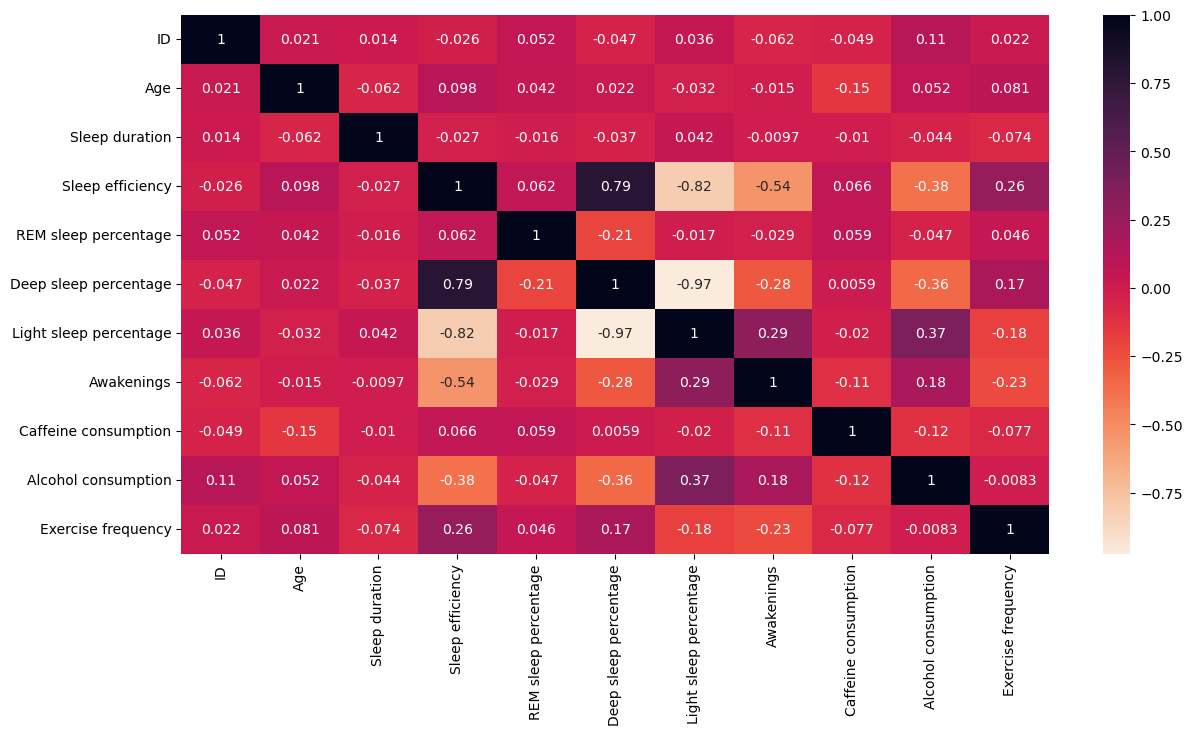

In [39]:
#  Verificando a correlação entre as variáveis com heatmap
plt.figure(figsize=(14,7))
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(base.corr(), annot=True, cmap='rocket_r')

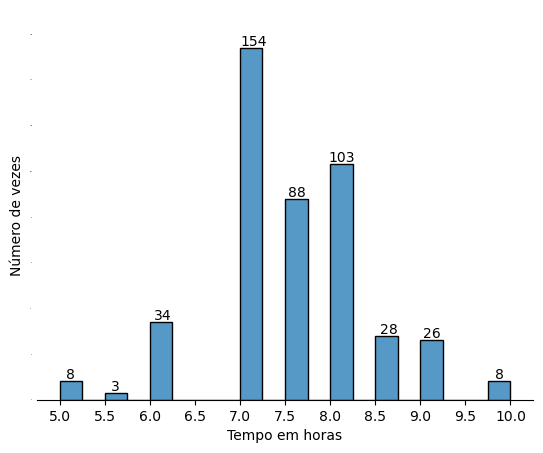

In [18]:
# Visualizando a coluna Sleep duration

fig, ax = plt.subplots()

sns.histplot(data=base, x='Sleep duration', discrete = False)

plt.annotate(8, (5.07,9))
plt.annotate(3, (5.57,4))
plt.annotate(34, (6.05,35))
plt.annotate(154, (7,155))
plt.annotate(88, (7.53,89))
plt.annotate(103, (7.98,104))
plt.annotate(28, (8.55,29))
plt.annotate(26, (9.03,27))
plt.annotate(8, (9.83,9))

plt.tick_params(axis='y', labelsize=0, length=0)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(np.arange(5,10.5, 0.5))
plt.xlabel('Tempo em horas')
plt.ylabel('Número de vezes')
plt.title(' ')
plt.show()

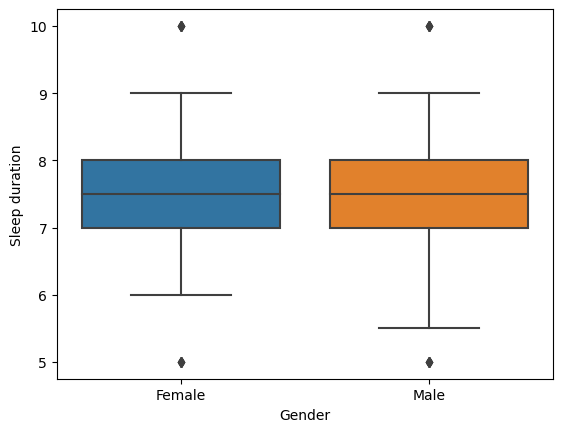

In [19]:
# Gerando um boxplot da coluna Sleep duration de acordo com o Gênero
sns.boxplot(data=base, x='Gender', y='Sleep duration')
plt.show()

### Checando os números com maior Sleep efficiency

In [20]:
base1 = base[base['Sleep efficiency'] > 0.9]

In [21]:
base.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.568584,22.345133,1.137168,1.767699
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.368698,29.848626,1.608938,1.433375
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,0.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


### Verificando os gráficos quando Sleep efficiency > 0.9

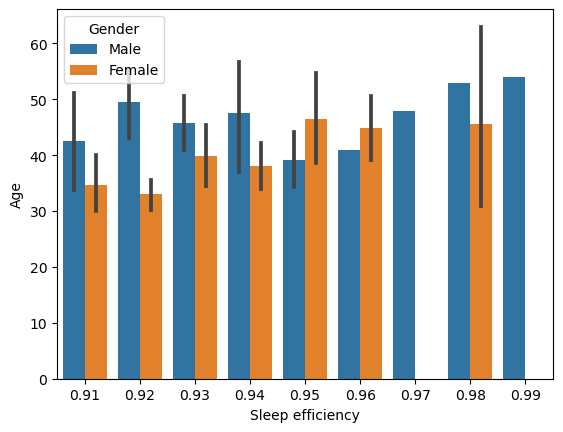

In [22]:
# Verificando Sleep efficiency com a coluna Age por Gender
sns.barplot(x=base1['Sleep efficiency'], y=base1['Age'], hue=base1['Gender'])
plt.show()

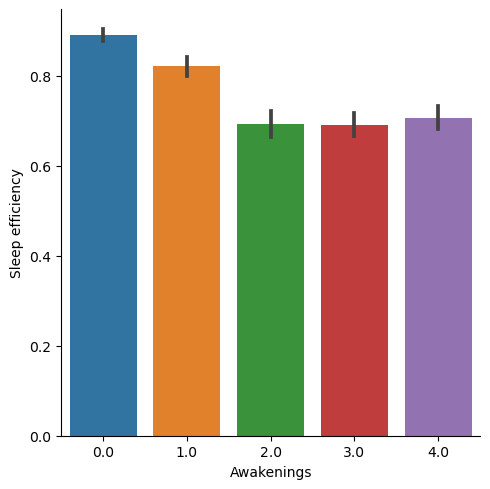

In [23]:
# Verificando Sleep efficiency com Awakenings
sns.catplot(data=base, x="Awakenings", y="Sleep efficiency", kind="bar");

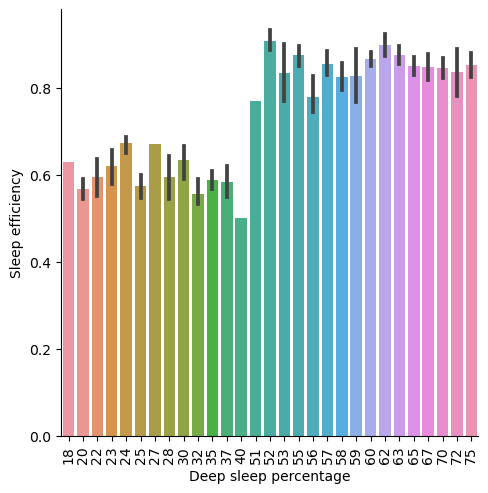

In [24]:
# Verificando Sleep efficiency com Deep sleep percentage
sns.catplot(data=base, x="Deep sleep percentage", y="Sleep efficiency", kind="bar")

plt.xticks(rotation=90)
plt.show()


<AxesSubplot:xlabel='Sleep duration', ylabel='Sleep efficiency'>

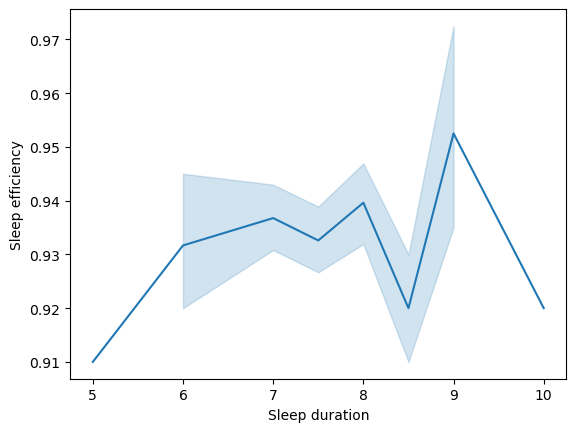

In [25]:
# Verificando Sleep efficiency com Sleep duration
sns.lineplot(data=base1, x='Sleep duration', y='Sleep efficiency')

In [26]:
base1['caffeine'] = base1['Caffeine consumption'].astype('bool')
base1['alcohol'] = base1['Alcohol consumption'].astype('bool')
base1['exercise'] = base1['Exercise frequency'].astype('bool')


C:\Users\luans\AppData\Local\Temp\ipykernel_21344\3114236418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['caffeine'] = base1['Caffeine consumption'].astype('bool')
C:\Users\luans\AppData\Local\Temp\ipykernel_21344\3114236418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['alcohol'] = base1['Alcohol consumption'].astype('bool')
C:\Users\luans\AppData\Local\Temp\ipykernel_21344\3114236418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [27]:
base1.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,caffeine,alcohol,exercise
10,11,50,Male,2021-02-28 00:30:00,2021-02-28 08:30:00,8.0,0.92,23,57,20,1.0,50.0,0.0,Yes,3.0,True,False,True
11,12,55,Male,2021-03-10 22:30:00,2021-03-10 06:00:00,7.5,0.93,18,60,22,0.0,0.0,0.0,No,3.0,False,False,True
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,0.93,24,58,18,0.0,50.0,0.0,No,1.0,True,False,True
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,0.92,25,55,20,0.0,50.0,2.0,No,5.0,True,True,True
18,19,43,Female,2021-07-27 00:00:00,2021-07-27 09:00:00,9.0,0.98,20,67,13,0.0,25.0,1.0,No,0.0,True,True,False


In [28]:
base1 = base1.replace(True, 1)
base1 = base1.replace(False, 0)

<AxesSubplot:xlabel='Sleep efficiency', ylabel='Count'>

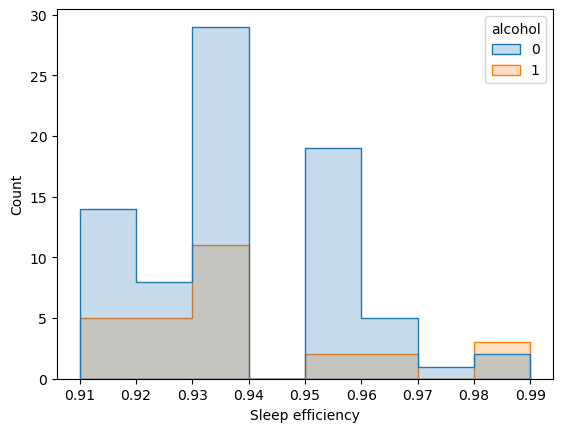

In [29]:
# Relação Sleep efficiency e bebe ou não álcool
sns.histplot(data=base1, x='Sleep efficiency', hue='alcohol', element='step')

<AxesSubplot:xlabel='Sleep efficiency', ylabel='Count'>

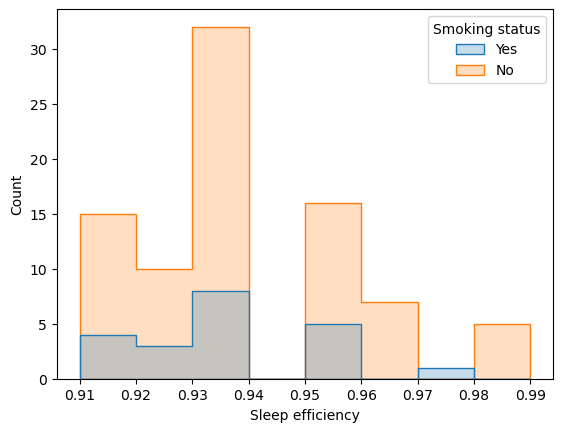

In [30]:
# Relação Sleep efficiency e se fuma ou não
sns.histplot(data=base1, x='Sleep efficiency', hue='Smoking status', element='step')

<AxesSubplot:xlabel='Sleep efficiency', ylabel='Count'>

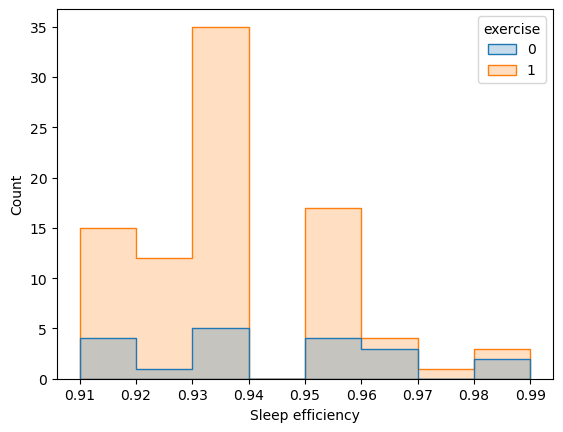

In [31]:
# Relação Sleep efficiency e se faz exercício ou não
sns.histplot(data=base1, x='Sleep efficiency', hue='exercise', element='step')

<AxesSubplot:xlabel='Sleep efficiency', ylabel='Count'>

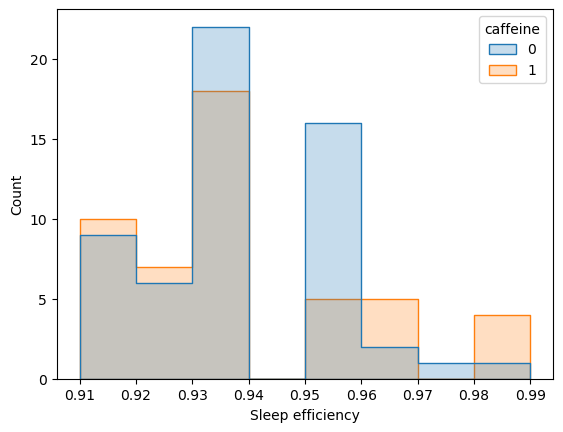

In [32]:
# Relação Sleep efficiency e se bebe café ou não
sns.histplot(data=base1, x='Sleep efficiency', hue='caffeine', element='step')